In this notebook, we will compare the methods developed for video stabilization using the criteria described in [1_Introduction_to_Digital_video_stabilization.ipynb](https://github.com/centralelyon/video-stabilization/blob/main/1_Introduction_to_Digital_video_stabilization.ipynb)

In [30]:
import cv2
import matplotlib.pyplot as plt
import json,os
import numpy as np

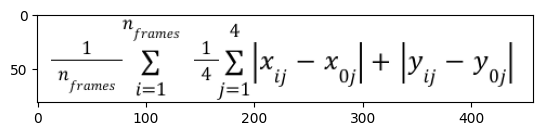

In [31]:
frame=cv2.imread("formula.png")
plt.imshow(frame)
plt.show()

We will work on the samples of the A4 sheet and will use the followinf frame as a reference frame. We need to minimize the distortion with respect to this frame

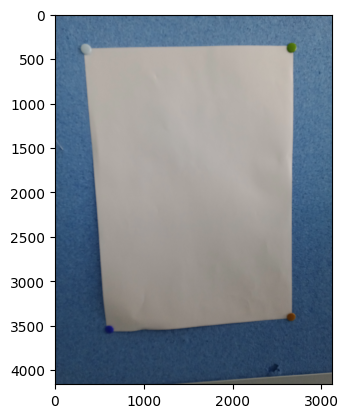

In [32]:
frame=cv2.imread("reference_frame.jpg")
plt.imshow(frame)
plt.show()

Let's display the keypoints that we want to make as stable and fixed as possible

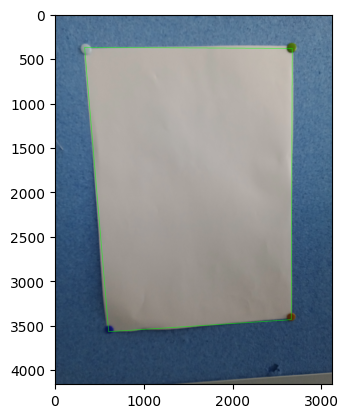

In [33]:
with open("reference_sheet_corners.json",'rb') as f:
  d=json.load(f)
  points=d['reference_frame']
  n_lines = len(points)
  for i in range(n_lines):
        point1 = (int(points[i][0]),int(points[i][1]))
        point2 = (int(points[(i+1) % n_lines][0]),int(points[(i+1) % n_lines][1]))
        cv2.line(frame, point1, point2, color=(0,255,0),thickness = 4)
plt.imshow(frame)
plt.show()


In [17]:
!unzip ffmpeg.zip

Archive:  ffmpeg.zip
   creating: ffmpeg/
  inflating: ffmpeg/vibrate_up_down_stabilized.mp4  
  inflating: ffmpeg/vibrate_randomly_stabilized.mp4  
  inflating: ffmpeg/video_after_rotation_stabilized.mp4  
  inflating: ffmpeg/video_after_translation_stabilized.mp4  
  inflating: ffmpeg/videoplayback_stabilized.mp4  
  inflating: ffmpeg/vibration_stabilized.mp4  


In [18]:
!unzip opencv_feature_matching.zip

Archive:  opencv_feature_matching.zip
   creating: opencv_feature_matching/
  inflating: opencv_feature_matching/vibrate_up_down_stabilized.mp4  
  inflating: opencv_feature_matching/vibrate_randomly_stabilized.mp4  
  inflating: opencv_feature_matching/video_after_rotation_stabilized.mp4  
  inflating: opencv_feature_matching/video_after_translation_stabilized.mp4  
  inflating: opencv_feature_matching/videoplayback_stabilized.mp4  


# Comparaison of the methods
Let's now for each method calculate for each video the metric above and plot the results to compare the methods

In [34]:
ffmpeg_score=[]
# calculate pixel shift for each frame of video
video_path="./ffmpeg"
for video in os.listdir(video_path):
  shift=0
  video = cv2.VideoCapture(os.path.join(video_path,video))
  total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  while True:
    ret,frame1=video.read()
    if not ret:
      break
    frame = np.resize(frame, (640, 360, 3))
    frame1= np.resize(frame1, (640, 360, 3))
    shift+=np.mean(abs(frame1-frame))
  ffmpeg_score.append(shift/total_frames)

In [35]:
feature_matching_score=[]
# calculate pixel shift for each frame of video
video_path="./opencv_feature_matching"
for video in os.listdir(video_path):
  shift=0
  video = cv2.VideoCapture(os.path.join(video_path,video))
  total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  while True:
    ret,frame1=video.read()
    if not ret:
      break
    frame = np.resize(frame, (640, 360, 3))
    frame1= np.resize(frame1, (640, 360, 3))
    shift+=np.mean(abs(frame1-frame))
  feature_matching_score.append(shift/total_frames)

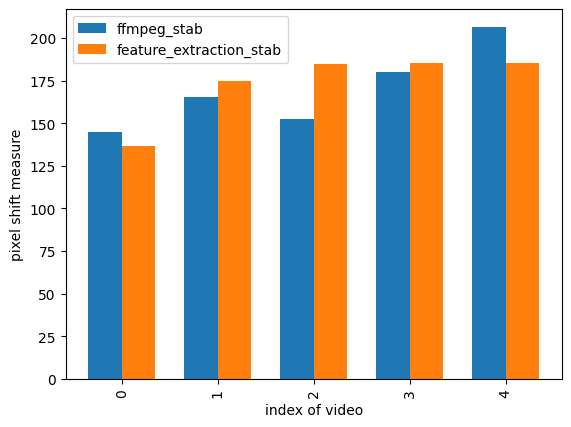

In [51]:
# plot the results to compare methods
x_data=os.listdir(video_path)
bar_width=0.35
x = np.arange(len(x_data))
plt.bar(x - bar_width/2, ffmpeg_score[:5], width=bar_width, label='ffmpeg_stab')

# Create the second set of bars next to the first set
plt.bar(x + bar_width/2, feature_matching_score, width=bar_width, label="feature_extraction_stab")
plt.legend()
plt.xlabel("index of video")
plt.ylabel("pixel shift measure")
plt.xticks(rotation=90)
plt.show()




So as we can see the two methods compete each other and that depends on the destabilization of the video (they both fail when it comes to zoom destabilization which is solved quite well with Davinci Resolve). We can add the results of vidstab package to this graph but visually, we concluded that this package gives worse results